# Team: The Quantiles
## Final Project -- Wine Quality Analysis

#### Step 1: Import necessary modules and libraries

In [1]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [23]:
import os

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import itertools

import seaborn as sns
sns.set()

import statsmodels.api as sm
import ggplot
from ggplot import *

import pylab

import graphviz



from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc,classification_report, mean_squared_error, explained_variance_score, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import ensemble
from sklearn.model_selection import KFold
from sklearn.cross_validation import cross_val_score, cross_val_predict

import math
from math import sqrt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/Users/michaelcolella/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/michaelcolella/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


#### Step 2: Read in data from UCI website

In [24]:
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
red_wine = pd.read_csv(url_red)

url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
white_wine = pd.read_csv(url_white)

#### Step 3: Exploratory Analysis

In [25]:
# Preview data -- need to to remove semicolons (see next step)
red_wine.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [26]:
# Get red wine data in usable format -- remove semicolons
rwine = pd.read_csv(url_red, sep=";")
rwine.head(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
# Review red wine df shape
rwine.shape

(1599, 12)

In [28]:
# Check for missing values in any column of red wine df -- no missing values
rwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [29]:
# Get white wine data in usable format -- remove semicolons
Wwine = pd.read_csv(url_white, sep=";")
Wwine.head(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [30]:
# Review white wine df shape
Wwine.shape # A lot more white wine data than red wine data

(4898, 12)

In [31]:
# Check for missing values in any column of white wine df -- no missing values
Wwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [32]:
# Examine ranges of red wine data
print(round(rwine.min(),2))
print(round(rwine.max(),2))

fixed acidity           4.60
volatile acidity        0.12
citric acid             0.00
residual sugar          0.90
chlorides               0.01
free sulfur dioxide     1.00
total sulfur dioxide    6.00
density                 0.99
pH                      2.74
sulphates               0.33
alcohol                 8.40
quality                 3.00
dtype: float64
fixed acidity            15.90
volatile acidity          1.58
citric acid               1.00
residual sugar           15.50
chlorides                 0.61
free sulfur dioxide      72.00
total sulfur dioxide    289.00
density                   1.00
pH                        4.01
sulphates                 2.00
alcohol                  14.90
quality                   8.00
dtype: float64


In [33]:
# Examine ranges of white wine data
print(round(Wwine.min(),2))
print(round(Wwine.max(),2))

fixed acidity           3.80
volatile acidity        0.08
citric acid             0.00
residual sugar          0.60
chlorides               0.01
free sulfur dioxide     2.00
total sulfur dioxide    9.00
density                 0.99
pH                      2.72
sulphates               0.22
alcohol                 8.00
quality                 3.00
dtype: float64
fixed acidity            14.20
volatile acidity          1.10
citric acid               1.66
residual sugar           65.80
chlorides                 0.35
free sulfur dioxide     289.00
total sulfur dioxide    440.00
density                   1.04
pH                        3.82
sulphates                 1.08
alcohol                  14.20
quality                   9.00
dtype: float64


In [34]:
# Get descriptive stats on the red wine
rwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [35]:
# Get descriptive stats on the white wine
Wwine.describe() # White has an overall higher quality score than red
# White wine mean quality score is 5.87, whereas red is 5.63

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [36]:
# Build a df which compares the average quality score for both red and white wines
combined_df_comparison = {'Average_Quality_Scores': [5.636023,5.877909], 
                          'Colors': ['Red','White']}
all_wine_means = pd.DataFrame(combined_df_comparison)
all_wine_means

,Average_Quality_Scores,Colors
0,5.636023,Red
1,5.877909,White


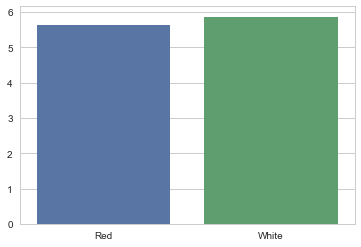

In [37]:
# Visually compare average quality scores

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

axes = {'xaxis': ['Red', 'White'], 'yaxis': [5.63, 5.87]}
sns.barplot(y = axes['yaxis'], x = axes['xaxis'], orient='v') # As one can see, white wins in terms of avg quality

#### Step 4: Prepare to join the white and red wine data sets

In [38]:
# Add a tag/column to white and red wine dfs prior to joining so easy it's easy to keep track of wine type per row
rwine['color'] = 'R' # R for red wine
Wwine['color'] = 'W' # W for white wine

#### Step 5: Join and examine the dfs

In [39]:
# Join the data sets for both red and white wines
all_wines = pd.concat([rwine,Wwine],axis=0)
all_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [40]:
# Examine combined df
all_wines.describe() # Avg among both types is 5.81

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


#### Step 6: Build and dummified df for potential later use

In [41]:
# Build dummy (combined) df for later use
df_new = pd.get_dummies(all_wines, columns=['color']) # Built based on color

In [42]:
# Visualize the dummy df
df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_R,color_W
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


#### Step 7: Build some plots to begin to visualize the relationship between features, color and quality score

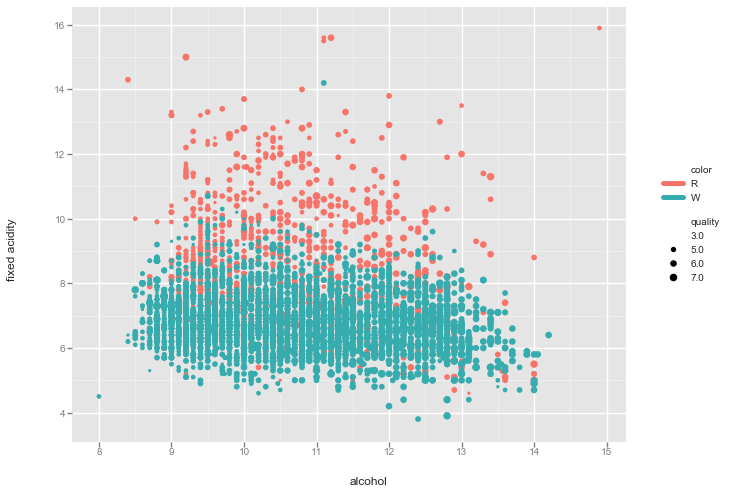

<ggplot: (7556706978)>

In [43]:
# Firstly, examine alcohol content vs fixed acidity
ggplot(all_wines, aes(x='alcohol', y='fixed acidity', color='color',size='quality')) + geom_point()

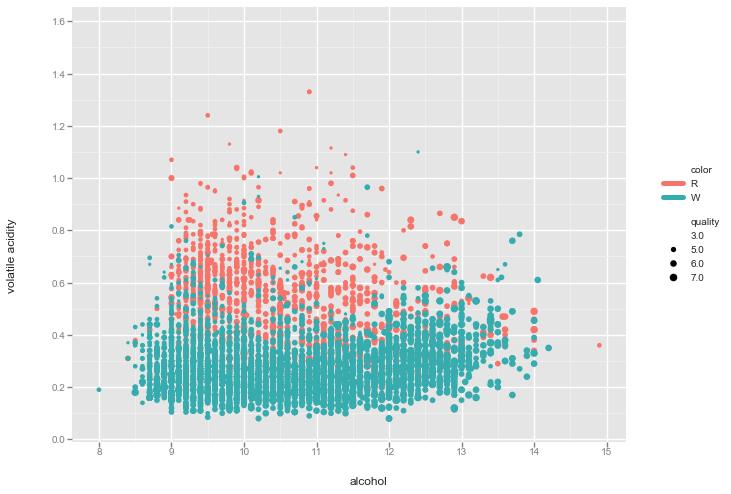

<ggplot: (-9223372029300944745)>

In [44]:
# Secondly, examine alcohol content vs variable acidity
ggplot(all_wines, aes(x='alcohol', y='volatile acidity', color='color',size='quality')) + geom_point()

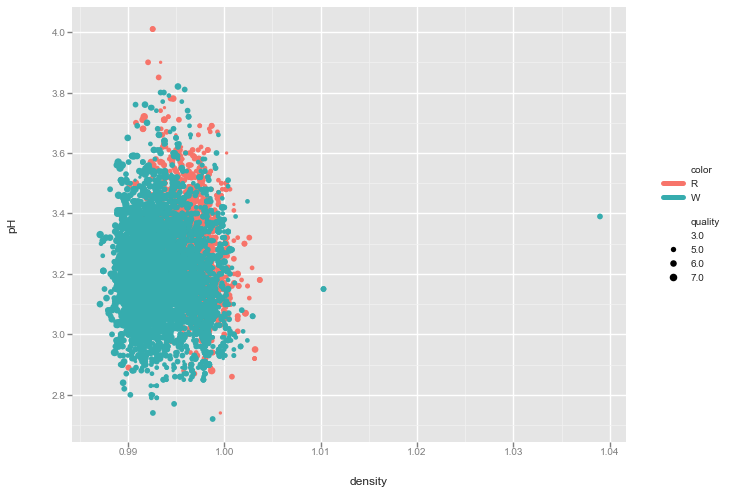

<ggplot: (-9223372029298252968)>

In [45]:
# Thirdly, examine density vs pH
ggplot(all_wines, aes(x='density', y='pH', color='color',size='quality')) + geom_point()

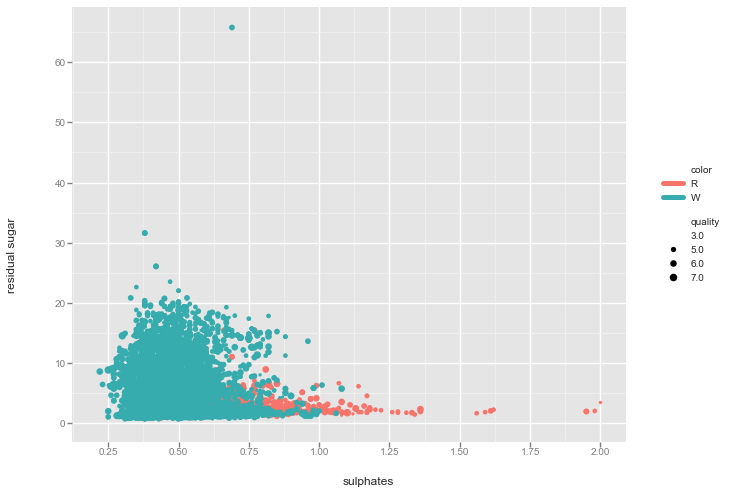

<ggplot: (-9223372029296611966)>

In [46]:
# Fourthly, examine sulphates vs residual sugar
ggplot(all_wines, aes(x='sulphates', y='residual sugar', color='color',size='quality')) + geom_point()

#### Step 8: Run descriptive statistics on all wines together

In [47]:
# Examine unique values for quality for ALL wines
all_wines['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [48]:
# Count unique values for ALL wine quality scores
all_wines.quality.value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [49]:
# Examine correlations among features for ALL wines combined
correlations_all = all_wines.corr()

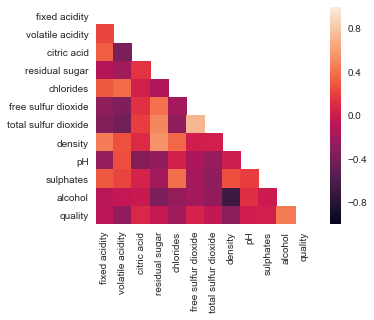

In [50]:
mask = np.zeros_like(correlations_all)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("whitegrid"):
     ax = sns.heatmap(correlations_all, mask=mask, vmin = -1, vmax=1, square=True)

In [51]:
# Extract numeric values from correlation matrix

# Numerical correlation matrix for ALL wine features
cmap = sns.diverging_palette(5, 250, as_cmap=True)

# Remember that correlation takes place between -1 and +1
correlations_all.style.background_gradient(cmap='Pastel1', axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '8pt'})

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.45891,-0.2527,0.299568,-0.0954515,-0.0767432
volatile acidity,0.219008,1,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.0376404,-0.265699
citric acid,0.324436,-0.377981,1,0.142451,0.038998,0.133126,0.195242,0.0961539,-0.329808,0.0561973,-0.0104935,0.0855317
residual sugar,-0.111981,-0.196011,0.142451,1,-0.12894,0.402871,0.495482,0.552517,-0.26732,-0.185927,-0.359415,-0.0369805
chlorides,0.298195,0.377124,0.038998,-0.12894,1,-0.195045,-0.27963,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1,0.720934,0.0257168,-0.145854,-0.188457,-0.179838,0.0554631
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.27963,0.720934,1,0.0323945,-0.238413,-0.275727,-0.26574,-0.0413855
density,0.45891,0.271296,0.0961539,0.552517,0.362615,0.0257168,0.0323945,1,0.0116861,0.259478,-0.686745,-0.305858
pH,-0.2527,0.261454,-0.329808,-0.26732,0.044708,-0.145854,-0.238413,0.0116861,1,0.192123,0.121248,0.0195057
sulphates,0.299568,0.225984,0.0561973,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1,-0.00302919,0.0384854


In [52]:
correlations_all['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

#### Step 9: Build wine categories based on qualitative assessment & add this column to the combined df

In [53]:
wine_groupings = [(all_wines['quality'] >= 8),(all_wines['quality'] <= 4)]
ratings = ['Great', 'Bad']
all_wines['Qualitative_Assessment'] = np.select(wine_groupings, ratings, default='Average')
all_wines.Qualitative_Assessment.value_counts()

Average    6053
Bad         246
Great       198
Name: Qualitative_Assessment, dtype: int64

In [54]:
# Visualize the add of the Qualitative Assessment column to combined wines data frame
all_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,Qualitative_Assessment
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R,Average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R,Average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R,Average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R,Average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R,Average


In [55]:
# Examine the average quality scores for the different qualitative categories of wines: Great, Average, Bad
all_wines.groupby('Qualitative_Assessment').mean()

# Trends:
# Great wine is less acidic, has more sugar than bad wine but less sugar than average wine.
# It also has fewer chlorides, more sulfur dioxide and and avg. quality score of 8.02

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Qualitative_Assessment,,,,,,,,,,,,
Average,7.221469,0.336151,0.319974,5.493772,0.056285,30.704940,116.095985,0.994759,3.217614,0.532959,10.465055,5.825045
Bad,7.357724,0.465163,0.273374,4.273984,0.062126,22.902439,105.701220,0.994944,3.234797,0.505732,10.184350,3.878049
Great,6.850000,0.291187,0.333889,5.351010,0.040778,34.505051,117.479798,0.992487,3.225354,0.511313,11.691414,8.025253


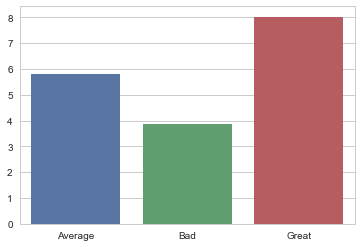

In [56]:
# Plot the average quality scores by type
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

axes = {'xaxis': ['Average', 'Bad','Great'], 'yaxis': [5.82, 3.87, 8.02]}
sns.barplot(y = axes['yaxis'], x = axes['xaxis'], orient='v')

# Great wines trend much higher, on average, as it relates to quality score

#### Step 10: Segment out red wine and examine quality

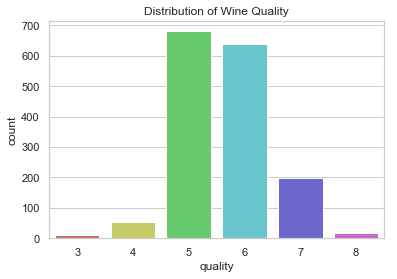

In [46]:
# View distribution of training target data
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x='quality',data=rwine,palette='hls')
plt.title('Distribution of Wine Quality')
plt.show(sns)

#### Step 11: Examine correlations among red wine features

In [47]:
correlations_red = rwine.corr()

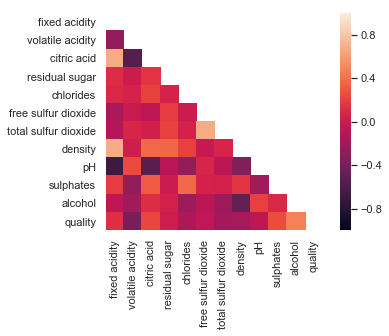

In [48]:
mask = np.zeros_like(correlations_red)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("whitegrid"):
     ax = sns.heatmap(correlations_red, mask=mask, vmin = -1, vmax=1, square=True)

In [49]:
# Numerical correlation matrix for red wine features

rwine.corr().style.background_gradient(cmap='YlGnBu', axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '8pt'})

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.256131,0.671703,0.114777,0.0937052,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.0616683,0.124052
volatile acidity,-0.256131,1,-0.552496,0.00191788,0.0612978,-0.0105038,0.07647,0.0220262,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1,0.143577,0.203823,-0.0609781,0.035533,0.364947,-0.541904,0.31277,0.109903,0.226373
residual sugar,0.114777,0.00191788,0.143577,1,0.0556095,0.187049,0.203028,0.355283,-0.0856524,0.00552712,0.0420754,0.0137316
chlorides,0.0937052,0.0612978,0.203823,0.0556095,1,0.00556215,0.0474005,0.200632,-0.265026,0.37126,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.0105038,-0.0609781,0.187049,0.00556215,1,0.667666,-0.0219458,0.0703775,0.0516576,-0.0694084,-0.0506561
total sulfur dioxide,-0.113181,0.07647,0.035533,0.203028,0.0474005,0.667666,1,0.0712695,-0.0664946,0.0429468,-0.205654,-0.1851
density,0.668047,0.0220262,0.364947,0.355283,0.200632,-0.0219458,0.0712695,1,-0.341699,0.148506,-0.49618,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.0856524,-0.265026,0.0703775,-0.0664946,-0.341699,1,-0.196648,0.205633,-0.0577314
sulphates,0.183006,-0.260987,0.31277,0.00552712,0.37126,0.0516576,0.0429468,0.148506,-0.196648,1,0.0935948,0.251397


In [50]:
correlations_red['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

#### Step 12: Examine correlations among white wine features

In [51]:
correlations_white = Wwine.corr()

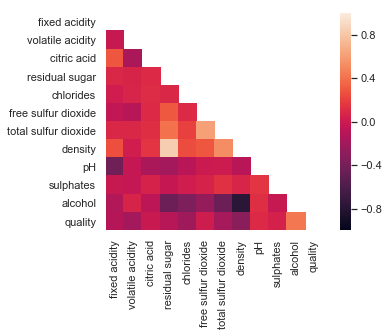

In [52]:
mask = np.zeros_like(correlations_white)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("whitegrid"):
     ax = sns.heatmap(correlations_white, mask=mask, vmin = -1, vmax=1, square=True)

In [53]:
# Numerical correlation matrix for white wine features

Wwine.corr().style.background_gradient(cmap='Accent', axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '8pt'})

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.0226973,0.289181,0.0890207,0.0230856,-0.0493959,0.0910698,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.0226973,1,-0.149472,0.0642861,0.0705116,-0.0970119,0.0892605,0.0271138,-0.0319154,-0.0357281,0.0677179,-0.194723
citric acid,0.289181,-0.149472,1,0.0942116,0.114364,0.0940772,0.121131,0.149503,-0.163748,0.0623309,-0.0757287,-0.00920909
residual sugar,0.0890207,0.0642861,0.0942116,1,0.0886845,0.299098,0.401439,0.838966,-0.194133,-0.0266644,-0.450631,-0.0975768
chlorides,0.0230856,0.0705116,0.114364,0.0886845,1,0.101392,0.19891,0.257211,-0.0904395,0.0167629,-0.360189,-0.209934
free sulfur dioxide,-0.0493959,-0.0970119,0.0940772,0.299098,0.101392,1,0.615501,0.29421,-0.000617796,0.0592172,-0.250104,0.00815807
total sulfur dioxide,0.0910698,0.0892605,0.121131,0.401439,0.19891,0.615501,1,0.529881,0.00232097,0.134562,-0.448892,-0.174737
density,0.265331,0.0271138,0.149503,0.838966,0.257211,0.29421,0.529881,1,-0.0935915,0.0744931,-0.780138,-0.307123
pH,-0.425858,-0.0319154,-0.163748,-0.194133,-0.0904395,-0.000617796,0.00232097,-0.0935915,1,0.155951,0.121432,0.0994272
sulphates,-0.017143,-0.0357281,0.0623309,-0.0266644,0.0167629,0.0592172,0.134562,0.0744931,0.155951,1,-0.0174328,0.0536779


In [54]:
correlations_white['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

#### Step 13: Multiple regression for red wine

In [11]:
# Regress ALL features against quality target
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 
            'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']
x_linear_rwine = rwine[features]
y_linear_rwine = rwine['quality']

C:\Users\danlew07\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\danlew07\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


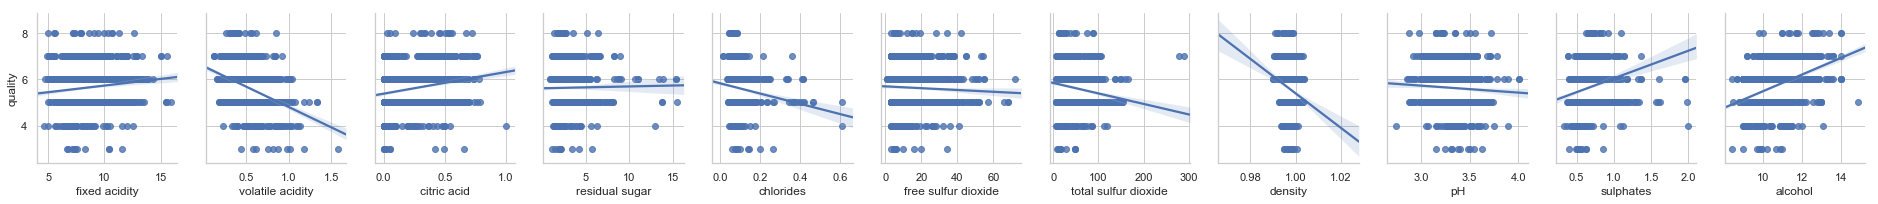

In [56]:
# Create a pair plot with a density plot of the # diagonal and format the scatter plots
sns.pairplot(rwine, x_vars=features, y_vars='quality', kind='reg',size=3,aspect=0.8)

In [12]:
x_train_linear_red, x_test_linear_red, y_train_linear_red, y_test_linear_red = train_test_split(x_linear_rwine,
                                                                                                y_linear_rwine,
                                                                                                test_size = .2,
                                                                                                random_state=6)

In [58]:
linear_model_red = LinearRegression()
linear_model_red.fit(x_train_linear_red,y_train_linear_red)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
linear_model_accuracy_red = linear_model_red.score(x_test_linear_red, y_test_linear_red)
"Linear Model Accuracy: {}%".format(int(round(linear_model_accuracy_red * 100)))

'Linear Model Accuracy: 39%'

In [60]:
# Predict with the linear model for red and with all features
lin_model_allRed_preds = linear_model_red.predict(x_test_linear_red)

In [61]:
rmse_linear_red_all = sqrt(mean_squared_error(y_test_linear_red, lin_model_allRed_preds))
print(rmse_linear_red_all) # the model is pretty good at predicting red wine; about 2/3 of 1 pt off in relation to 
# quality scores

0.6175467392419326


In [62]:
# Re-build models with only important features from correlation matrix to see if can improve accuracy

features_important_red = ['fixed acidity', 'citric acid', 'sulphates', 'alcohol']
x_linear_important_red = rwine[features_important_red]
y_linear_important_red = rwine['quality']

x_train_lin_imp_red, x_test_lin_imp_red, y_train_lin_imp_red, y_test_lin_imp_red = train_test_split(x_linear_important_red, 
                                                                                    y_linear_important_red,
                                                                                    test_size = .20, random_state = 6)

In [63]:
linear_model_imp_red = LinearRegression()
linear_model_imp_red.fit(x_train_lin_imp_red,y_train_lin_imp_red)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
linear_model_accuracy_imp_red = linear_model_imp_red.score(x_test_lin_imp_red, y_test_lin_imp_red)
"Linear Model Accuracy: {}%".format(int(round(linear_model_accuracy_imp_red * 100))) # accuracy did not improve

'Linear Model Accuracy: 29%'

#### Step 14: Multiple regression for white wine

In [65]:
x_linear_Wwine = Wwine[features]
y_linear_Wwine = Wwine['quality']

C:\Users\danlew07\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\danlew07\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


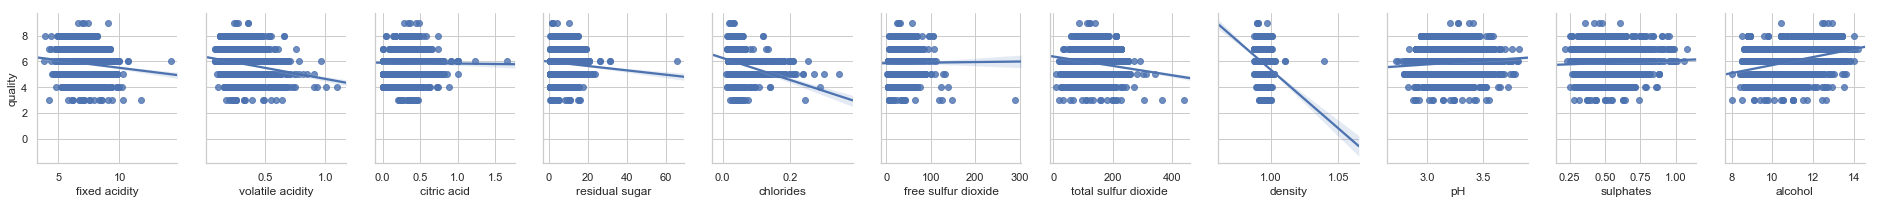

In [66]:
# Create a pair plot with a density plot of the # diagonal and format the scatter plots
sns.pairplot(Wwine, x_vars=features, y_vars='quality', kind='reg',size=3,aspect=0.8)

In [67]:
x_train_linear_white, x_test_linear_white, y_train_linear_white, y_test_linear_white = train_test_split(x_linear_Wwine,
                                                                                                        y_linear_Wwine,
                                                                                                        test_size = .2,
                                                                                                        random_state=6)

In [68]:
linear_model_white = LinearRegression()
linear_model_white.fit(x_train_linear_white,y_train_linear_white)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
linear_model_accuracy_white = linear_model_white.score(x_test_linear_white, y_test_linear_white)
"Linear Model Accuracy: {}%".format(int(round(linear_model_accuracy_white * 100)))

'Linear Model Accuracy: 26%'

In [70]:
# Predict with the linear model for white and with all features
lin_model_allWhite_preds = linear_model_white.predict(x_test_linear_white)

In [71]:
rmse_linear_white_all = sqrt(mean_squared_error(y_test_linear_white, lin_model_allWhite_preds))
print(rmse_linear_white_all) # the model is slightly worse at predicting white wine

0.7382581596046109


In [72]:
# Re-build models with only important features from correlation matrix to see if can improve accuracy

features_important_white = ['pH','free sulfur dioxide','sulphates','alcohol']
x_linear_important_white = Wwine[features_important_white]
y_linear_important_white = Wwine['quality']

x_train_lin_imp_white, x_test_lin_imp_white, y_train_lin_imp_white, y_test_lin_imp_white = train_test_split(x_linear_important_white, 
                                                                                    y_linear_important_white,
                                                                                    test_size = .20, random_state = 6)

In [73]:
linear_model_imp_white = LinearRegression()
linear_model_imp_white.fit(x_train_lin_imp_white,y_train_lin_imp_white)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
linear_model_accuracy_imp_white = linear_model_imp_white.score(x_test_lin_imp_white, y_test_lin_imp_white)
"Linear Model Accuracy: {}%".format(int(round(linear_model_accuracy_imp_white * 100))) # accuracy did not improve and
# is actually pretty bad
# let's see if it gets better with the full wine dataset

'Linear Model Accuracy: 22%'

#### Step 15: Multiple regression for ALL wine

In [75]:
x_linear_allWine = all_wines[features]
y_linear_allWine = all_wines['quality']

C:\Users\danlew07\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\danlew07\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


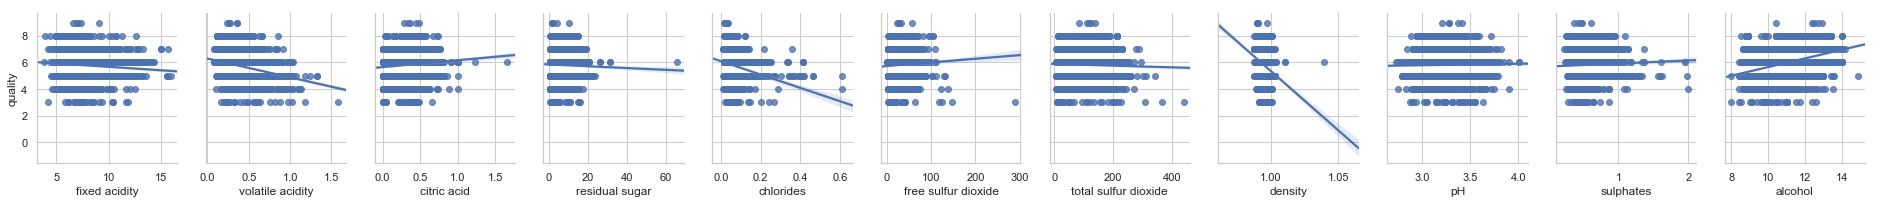

In [76]:
# Create a pair plot with a density plot of the # diagonal and format the scatter plots
sns.pairplot(all_wines, x_vars=features, y_vars='quality', kind='reg',size=3,aspect=0.8)

In [77]:
x_train_linear_ALL, x_test_linear_ALL, y_train_linear_ALL, y_test_linear_ALL = train_test_split(x_linear_allWine,
                                                                                                        y_linear_allWine,
                                                                                                        test_size = .2,
                                                                                                        random_state=6)

In [ ]:
x_train_linear_red, x_test_linear_red, y_train_linear_red, y_test_linear_red = train_test_split(x_linear_allWine,
                                                                                                        y_linear_allWine,
                                                                                                        test_size = .2,
                                                                                                        random_state=6)

In [78]:
linear_model_ALL = LinearRegression()
linear_model_ALL.fit(x_train_linear_ALL,y_train_linear_ALL)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
# Predict with the linear model ALL
lin_model_all_preds = linear_model_ALL.predict(x_test_linear_ALL)

In [80]:
linear_model_accuracy_ALL = linear_model_ALL.score(x_test_linear_ALL, y_test_linear_ALL)
"Linear Model Accuracy: {}%".format(int(round(linear_model_accuracy_ALL * 100)))

'Linear Model Accuracy: 29%'

In [81]:
# Solve for Root Mean Squared Error, rmse
# How close observed data points are to model predictions
# Same units as dependent variable
# Most important criteria for fit (if aim is prediction) -- lower values mean better fit
rmse_linear_all = sqrt(mean_squared_error(y_test_linear_ALL, lin_model_all_preds))
print(rmse_linear_all) # not as good as with boosting and worse than K-Folds; overall it's on par with predicting
# only white wine

0.7421494226311286


In [82]:
# Re-build models with only important features from correlation matrix to see if can improve accuracy

features_important_ALL = ['alcohol','citric acid','free sulfur dioxide', 'sulphates']
x_linear_important_ALL = all_wines[features_important_ALL]
y_linear_important_ALL = all_wines['quality']

x_train_lin_imp_ALL, x_test_lin_imp_ALL, y_train_lin_imp_ALL, y_test_lin_imp_ALL = train_test_split(x_linear_important_ALL, 
                                                                                    y_linear_important_ALL,
                                                                                    test_size = .20, random_state = 6)

In [83]:
linear_model_imp_ALL = LinearRegression()
linear_model_imp_ALL.fit(x_train_lin_imp_ALL,y_train_lin_imp_ALL)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
linear_model_accuracy_imp_ALL = linear_model_imp_ALL.score(x_test_lin_imp_ALL, y_test_lin_imp_ALL)
"Linear Model Accuracy: {}%".format(int(round(linear_model_accuracy_imp_white * 100))) # unimpressive results

'Linear Model Accuracy: 22%'

#### Step 15.5: Gradient boosting & K-Folds method to improve accuracy

In [13]:
boost = ensemble.GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1,
                                          loss = 'ls')
boost.fit(x_train_linear_red,y_train_linear_red)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [15]:
boost.score(x_test_linear_red,y_test_linear_red)

0.4756976750835081

In [17]:
boost_preds = boost.predict(x_test_linear_red)

In [19]:
# Solve for Root Mean Squared Error, rmse
# How close observed data points are to model predictions
# Same units as dependent variable
# Most important criteria for fit (if aim is prediction) -- lower values mean better fit
rmse_boost = sqrt(mean_squared_error(y_test_linear_red, boost_preds))
print(rmse_boost) # Better than with K-Folds

0.5722802006331374


In [21]:
# K folds for cross validation -- more folds we have we reduce error due bias but increase error due to variance
kfold_df = rwine

In [22]:
kf = KFold(n_splits = 5, shuffle = True)
result = next(kf.split(kfold_df), None)
print(result)

(array([   0,    4,    5, ..., 1595, 1596, 1597]), array([   1,    2,    3,    7,   10,   14,   16,   22,   24,   52,   54,
         61,   83,   86,   87,   93,   95,   97,   98,  100,  109,  111,
        119,  125,  130,  136,  148,  150,  159,  162,  163,  167,  169,
        180,  191,  201,  203,  208,  209,  214,  229,  240,  244,  245,
        264,  274,  276,  282,  295,  300,  301,  306,  312,  313,  322,
        324,  326,  335,  339,  340,  348,  353,  365,  379,  385,  386,
        390,  392,  396,  397,  401,  402,  405,  409,  413,  416,  417,
        419,  421,  438,  441,  443,  444,  454,  455,  458,  462,  467,
        479,  480,  485,  490,  491,  495,  500,  507,  508,  510,  514,
        530,  533,  547,  548,  554,  561,  575,  578,  583,  589,  591,
        600,  602,  604,  615,  616,  620,  633,  648,  655,  656,  663,
        668,  669,  670,  673,  675,  683,  694,  701,  702,  703,  706,
        713,  717,  722,  739,  740,  742,  747,  749,  754,  755,  766,


In [23]:
train = kfold_df.iloc[result[0]]
test =  kfold_df.iloc[result[1]]

In [24]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,R
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,R
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,R


In [25]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,R
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,R


In [26]:
x_train2 = train.iloc[:,0:11]
y_train2 = train.iloc[:,11:12]

x_test2 = test.iloc[:,0:11]
y_test2 = test.iloc[:,11:12]

In [27]:
# Fit model on kfold training data
kfold_lm = linear_model.LinearRegression()
kfold_trained_model = kfold_lm.fit(x_train2, y_train2)

# Use model fitted on training data to predict test data
kfold_preds = kfold_trained_model.predict(x_test2)

In [28]:
# Accuracy post-cross-validation
"KFold Linear Model Accuracy: {}%".format(int(round(kfold_trained_model.score(x_test2, y_test2) * 100)))
# Slightly improved from 29% above on intial multiple regression model including all features

'KFold Linear Model Accuracy: 32%'

In [29]:
# Solve for Root Mean Squared Error, rmse
# How close observed data points are to model predictions
# Same units as dependent variable
# Most important criteria for fit (if aim is prediction) -- lower values mean better fit
kfold_rmse = sqrt(mean_squared_error(y_test2, kfold_preds))
print(kfold_rmse)

0.6974629972172388


#### Step 16: Remove Outliers & Test for Normality

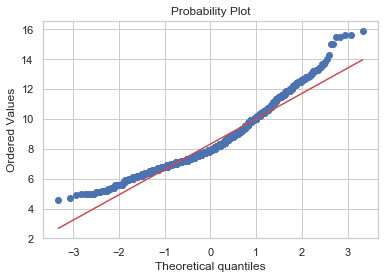

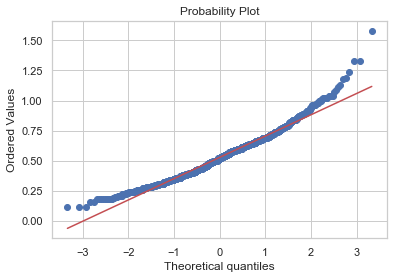

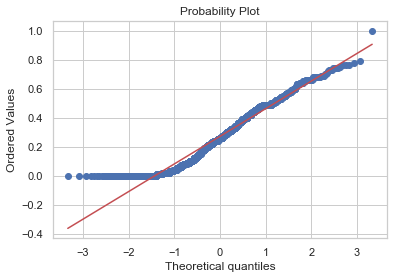

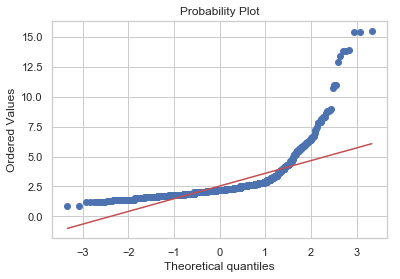

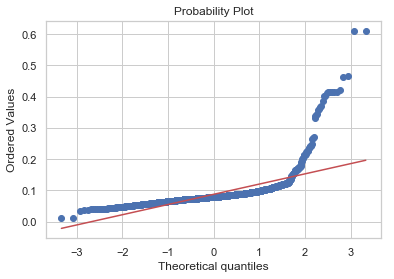

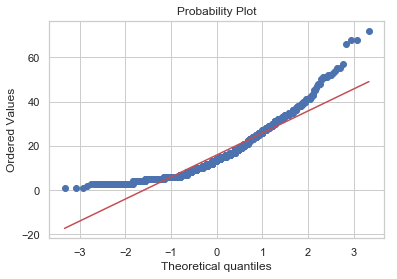

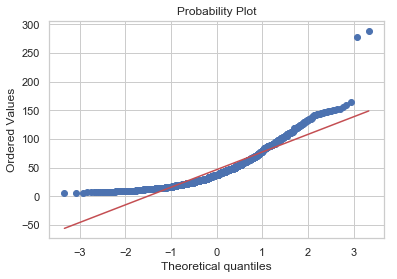

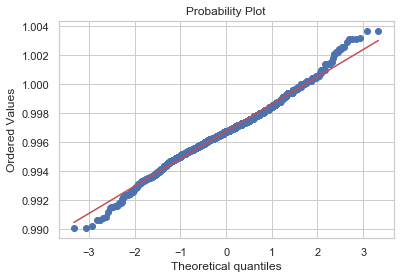

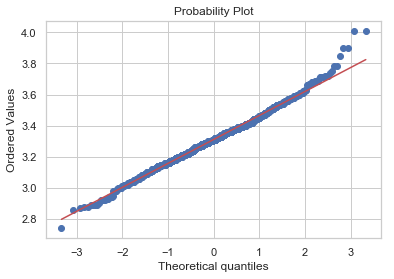

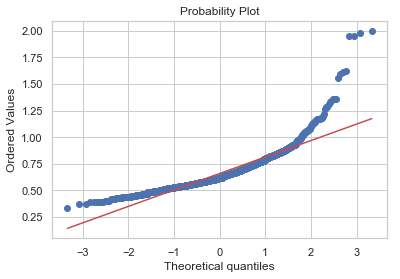

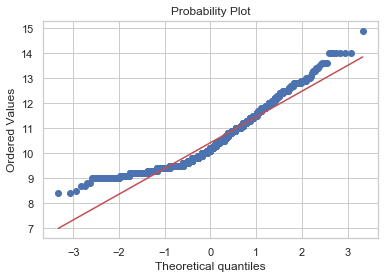

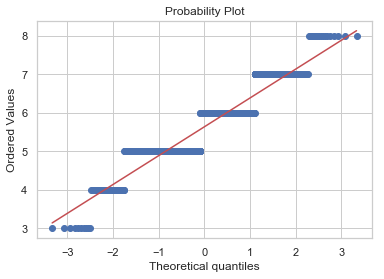

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [23]:
#white wine
#qqplots to check for normality
#some variables have outliers
for x in all_wines:
    stats.probplot(rwine[x], dist="norm", plot=pylab)
    pylab.show()

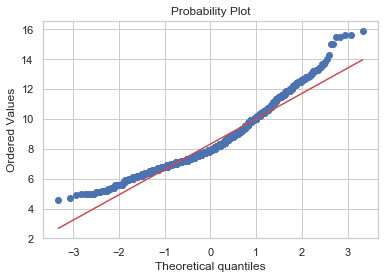

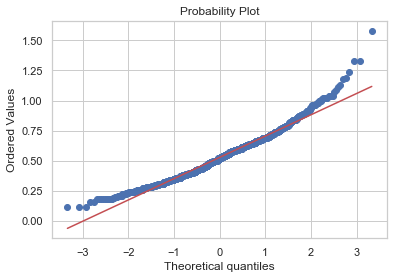

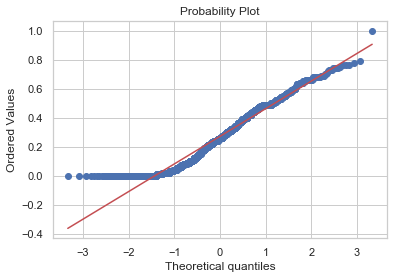

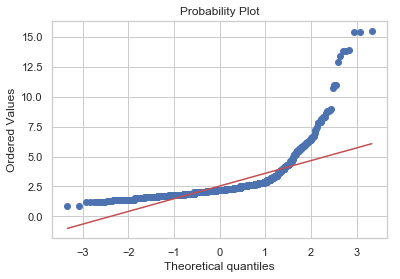

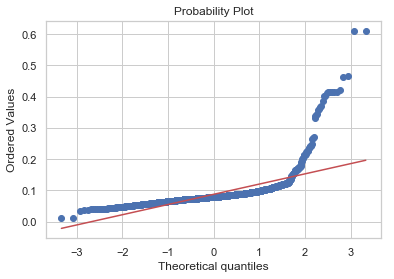

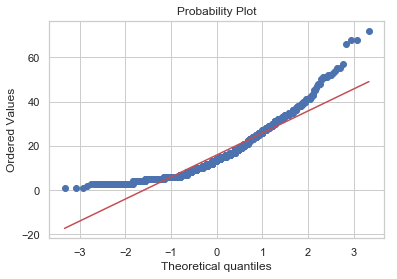

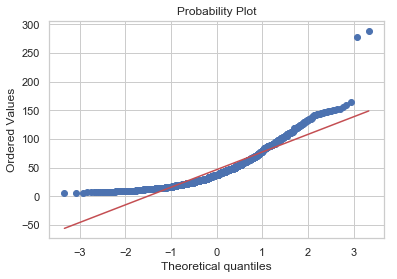

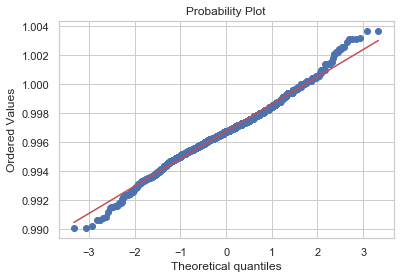

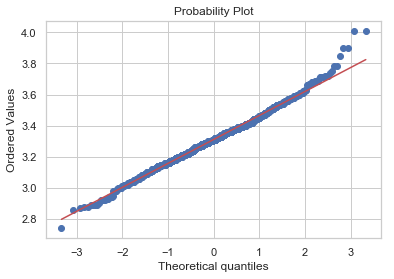

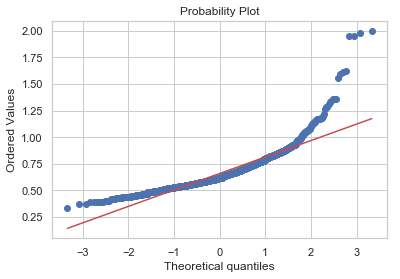

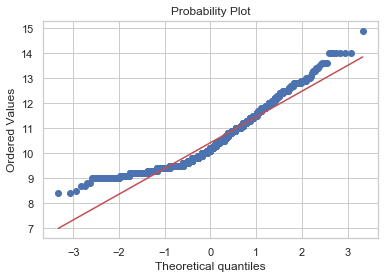

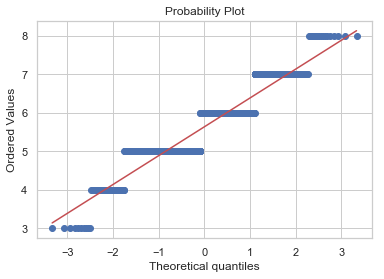

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [21]:
#white wine
#qqplots to check for normality
#some variables have outliers
for x in Wwine:
    stats.probplot(rwine[x], dist="norm", plot=pylab)
    pylab.show()

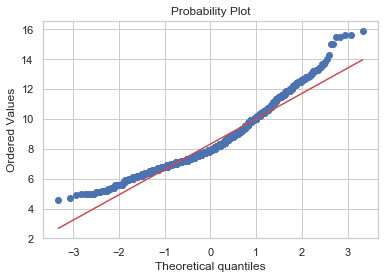

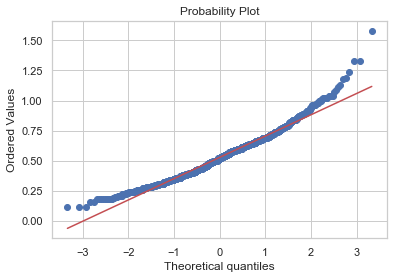

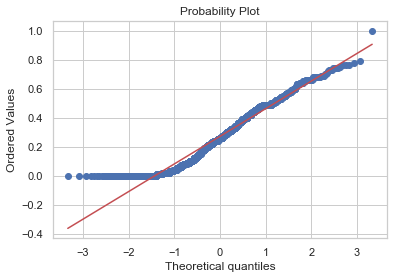

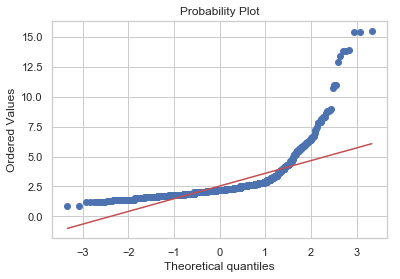

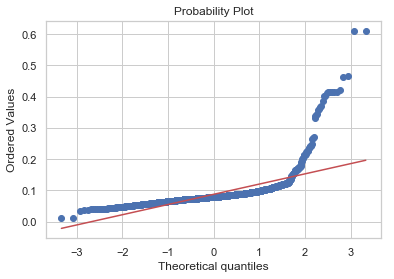

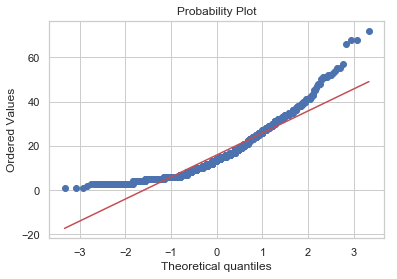

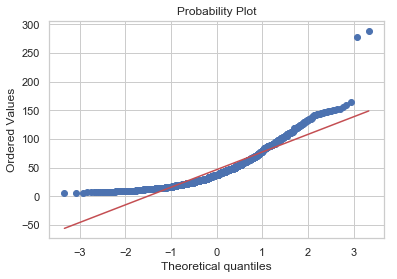

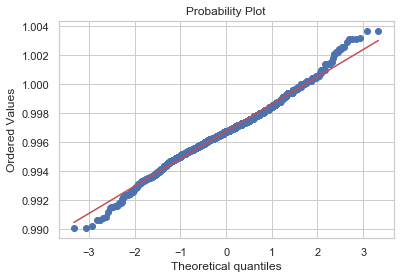

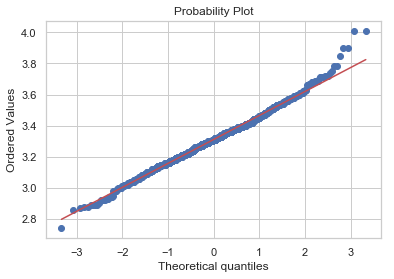

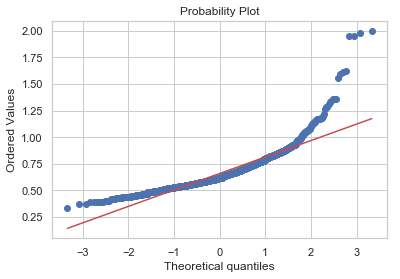

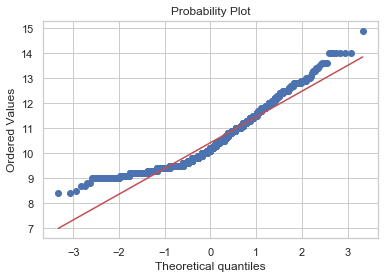

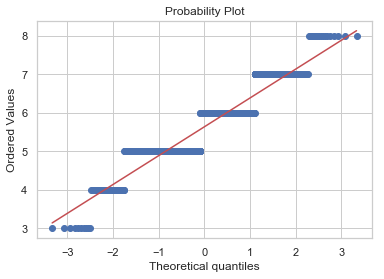

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [98]:
#qqplots to check for normality
#some variables have outliers
for x in rwine:
    stats.probplot(rwine[x], dist="norm", plot=pylab)
    pylab.show()

In [34]:
## Remove outliers 
rwine_data = rwine.drop(['quality','color'], axis=1)
rwine_data = rwine[(np.abs(stats.zscore(rwine_data)) < 3).all(axis=1)]
print(rwine.shape,rwine_data.shape)

(1599, 13) (1458, 13)


In [24]:
## Remove outliers 
wwine_data = Wwine.drop(['quality','color'], axis=1)
wwine_data = Wwine[(np.abs(stats.zscore(wwine_data)) < 3).all(axis=1)]
print(Wwine.shape,wwine_data.shape)

## Remove outliers 
all_wines_data = all_wines.drop(['quality','color'], axis=1)
all_wines_data = all_wines[(np.abs(stats.zscore(all_wines_data)) < 3).all(axis=1)]
print(all_wines.shape,all_wines_data.shape)

(1599, 13) (1458, 13)
(4898, 13) (4502, 13)
(6497, 13) (6009, 13)


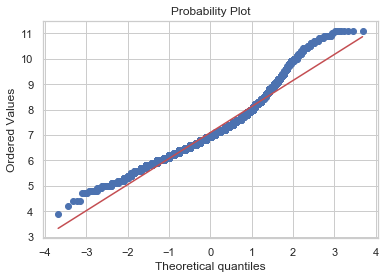

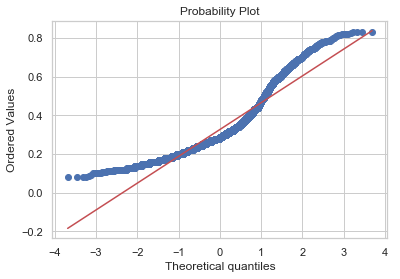

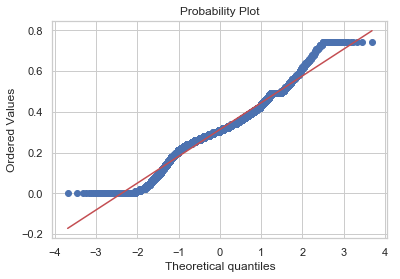

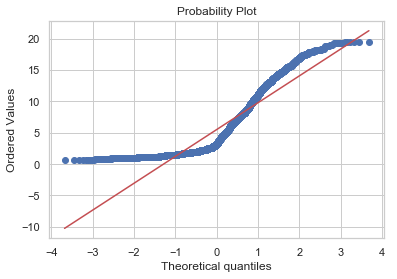

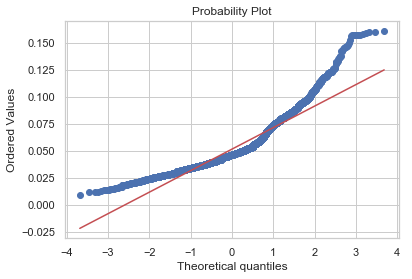

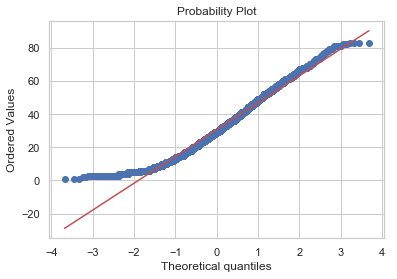

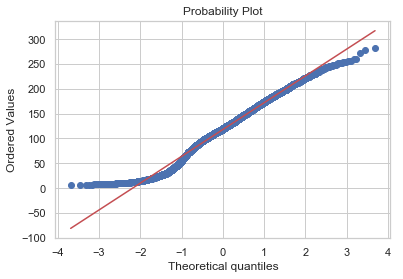

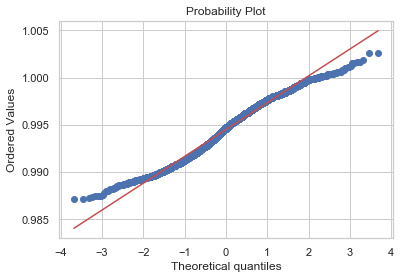

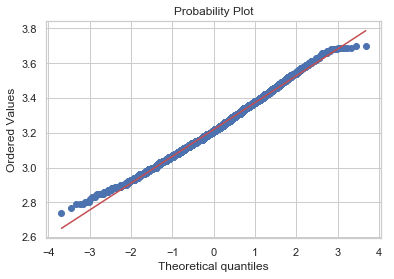

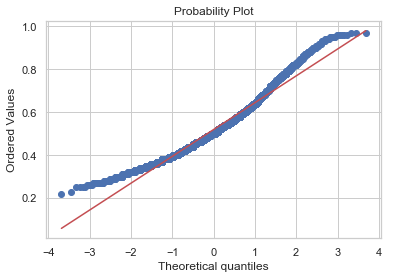

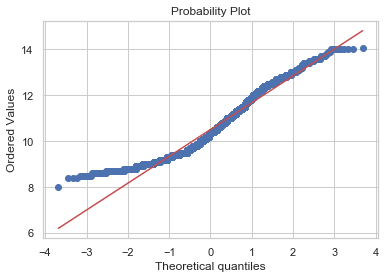

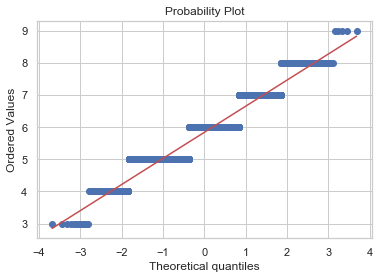

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [25]:
#all wine
##qqplots to check for normality
for x in all_wines_data:
    stats.probplot(all_wines_data[x], dist="norm", plot=pylab)
    pylab.show()

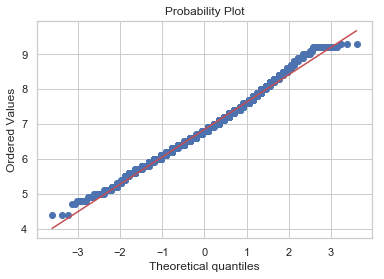

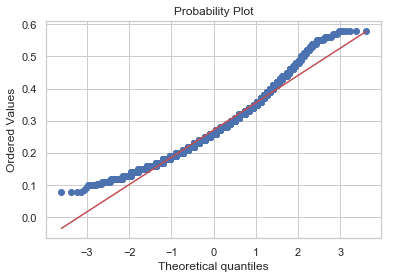

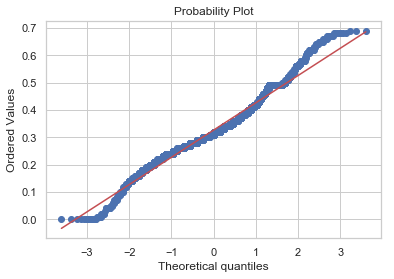

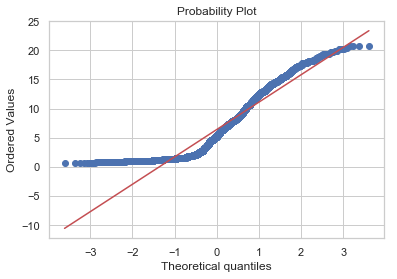

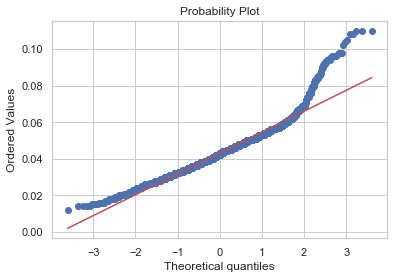

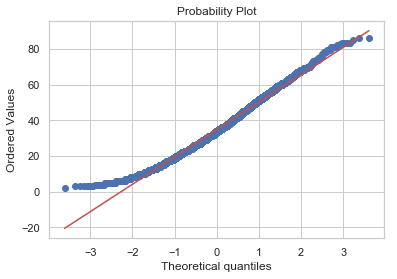

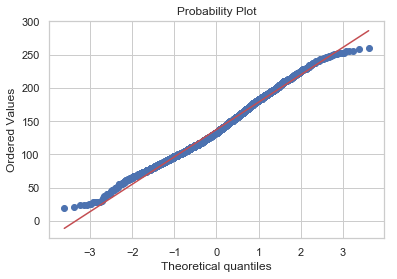

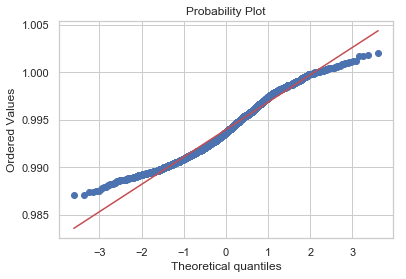

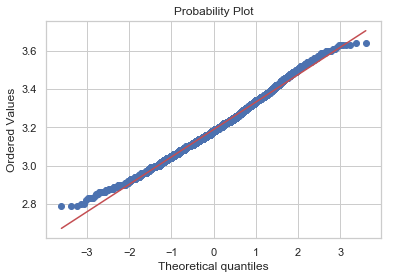

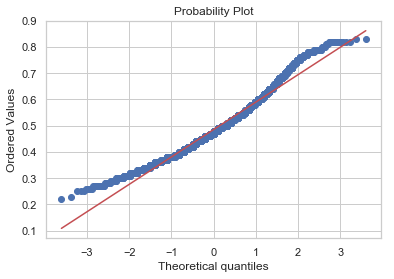

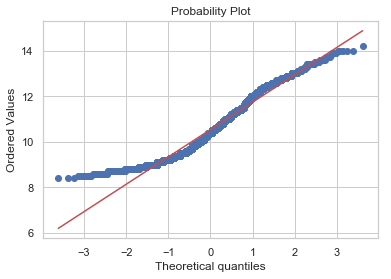

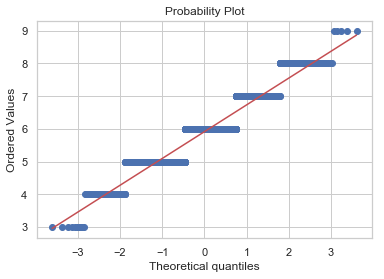

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [26]:
#white wine
##qqplots to check for normality
for x in wwine_data:
    stats.probplot(wwine_data[x], dist="norm", plot=pylab)
    pylab.show()

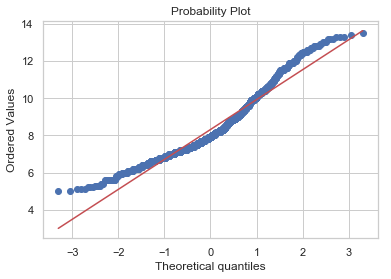

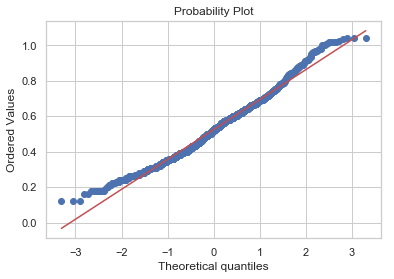

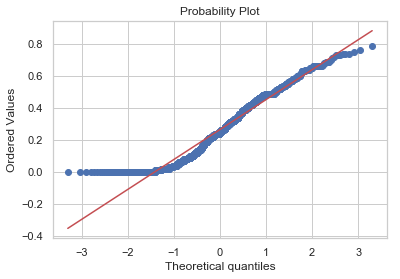

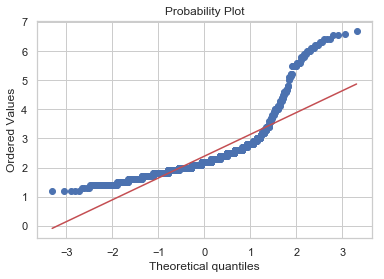

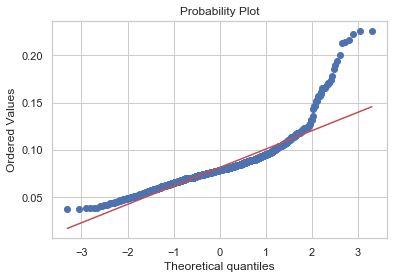

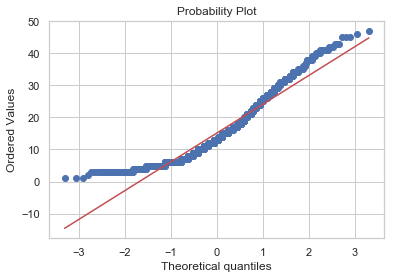

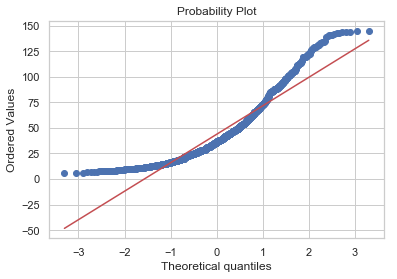

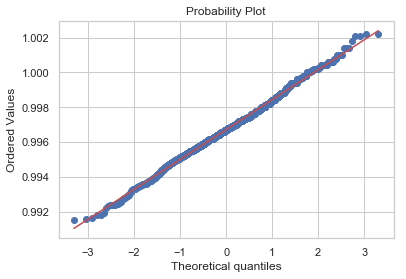

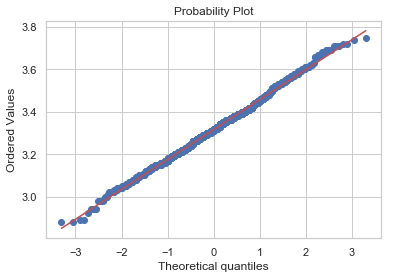

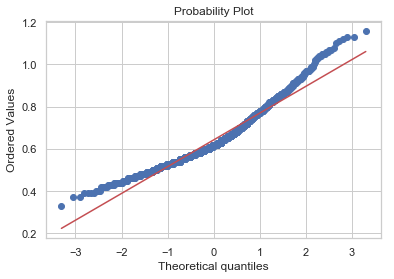

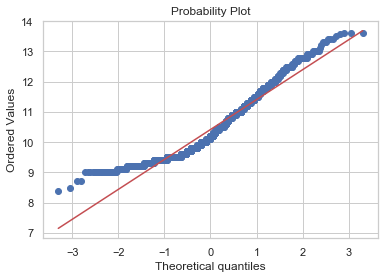

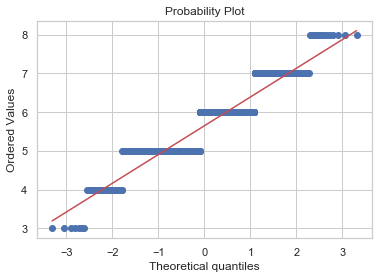

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [100]:
##qqplots to check for normality
for x in rwine_data:
    stats.probplot(rwine_data[x], dist="norm", plot=pylab)
    pylab.show()

#### Step 17: Split Data into Train & Test

In [35]:
X = rwine_data.drop(['quality','color'], axis = 1)
y = rwine_data.quality

In [32]:
X_white = wwine_data.drop(['quality','color'], axis = 1)
y_white = wwine_data.quality

X_all = all_wines_data.drop(['quality','color'], axis = 1)
y_all = all_wines_data.quality

NameError: name 'rwine_data' is not defined

In [29]:
#red
X.shape
y.shape

(1458,)

In [30]:
#white
X_white.shape
y_white.shape

(4502,)

In [31]:
#all
X_all.shape
y_all.shape

(6009,)

In [36]:
#red
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .3, shuffle = True, random_state = 123)

In [32]:
#white
x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(X_white, y_white, test_size = .3, shuffle = True, random_state = 123)

In [34]:
#all
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size = .3, shuffle = True, random_state = 123)

In [37]:
#red
#reshape y-train and y_test
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [36]:
#white
#reshape y-train and y_test
y_train_w = np.ravel(y_train_w)
y_test_w = np.ravel(y_test_w)

In [37]:
#all
#reshape y-train and y_test
y_train_all = np.ravel(y_train_all)
y_test_all = np.ravel(y_test_all)

#### Step 18: Scale Data

In [38]:
#red
##Scale all features / predictors (NOT THE TARGET VARIABLE)
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [38]:
#white
##Scale all features / predictors (NOT THE TARGET VARIABLE)
scale = StandardScaler()
x_train_scaled_white = scale.fit_transform(x_train_w)
x_test_scaled_white = scale.transform(x_test_w)

In [40]:
#all
##Scale all features / predictors (NOT THE TARGET VARIABLE)
scale = StandardScaler()
x_train_scaled_all = scale.fit_transform(x_train_all)
x_test_scaled_all = scale.transform(x_test_all)

#### Step 19: Decision Trees

In [41]:
dt_obj = tree.DecisionTreeClassifier()

In [42]:
#red
dt_obj.fit(x_train_scaled,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
#white
dt_obj.fit(x_train_scaled_white,y_train_w)

NameError: name 'x_train_scaled_white' is not defined

In [45]:
#all
dt_obj.fit(x_train_scaled_all,y_train_all)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
#red
y_pred = dt_obj.predict(x_test_scaled)

In [40]:
#white
y_pred_white = dt_obj.predict(x_test_scaled_white)

NameError: name 'dt_obj' is not defined

In [47]:
#all
y_pred_all = dt_obj.predict(x_test_scaled_all)

In [46]:
#red
from IPython.display import display, HTML
cm_tree = pd.DataFrame(confusion_matrix(y_true = y_test, y_pred = y_pred),index = [3,4,5,6,7,8], columns = [3,4,5,6,7,8])
cm_tree_pct = round(cm_tree/len(y_test),2)
cm_tree_diag = round(np.trace(cm_tree_pct),2)

display(cm_tree_pct)
print(cm_tree_diag)

,3,4,5,6,7,8
3,0.0,0.00,0.00,0.00,0.00,0.00
4,0.0,0.00,0.03,0.00,0.00,0.00
5,0.0,0.02,0.32,0.11,0.01,0.00
6,0.0,0.01,0.06,0.22,0.05,0.01
7,0.0,0.00,0.02,0.05,0.07,0.00
8,0.0,0.00,0.00,0.00,0.00,0.00


0.61


In [50]:
#white
cm_tree_white = pd.DataFrame(confusion_matrix(y_true = y_test_w, y_pred = y_pred_white),index = [3,4,5,6,7,8,9], columns = [3,4,5,6,7,8,9])
cm_tree_pct_white = round(cm_tree_white/len(y_test_w),2)
cm_tree_diag_white = round(np.trace(cm_tree_pct_white),2)

print(cm_tree_pct_white)
print(cm_tree_diag_white)

      3     4     5     6     7     8    9
3  0.00  0.00  0.00  0.00  0.00  0.00  0.0
4  0.00  0.01  0.01  0.01  0.00  0.00  0.0
5  0.00  0.02  0.15  0.10  0.01  0.00  0.0
6  0.01  0.01  0.12  0.22  0.07  0.01  0.0
7  0.00  0.01  0.03  0.08  0.07  0.01  0.0
8  0.00  0.00  0.00  0.02  0.01  0.01  0.0
9  0.00  0.00  0.00  0.00  0.00  0.00  0.0
0.46


In [52]:
#all
cm_tree_all = pd.DataFrame(confusion_matrix(y_true = y_test_all, y_pred = y_pred_all),index = [3,4,5,6,7,8,9], columns = [3,4,5,6,7,8,9])
cm_tree_pct_all = round(cm_tree_all/len(y_test_all),2)
cm_tree_diag_all = round(np.trace(cm_tree_pct_all),2)

print(cm_tree_pct_all)
print(cm_tree_diag_all)

     3     4     5     6     7     8    9
3  0.0  0.00  0.00  0.00  0.00  0.00  0.0
4  0.0  0.01  0.01  0.01  0.00  0.00  0.0
5  0.0  0.01  0.20  0.10  0.01  0.00  0.0
6  0.0  0.00  0.09  0.27  0.06  0.01  0.0
7  0.0  0.00  0.01  0.06  0.09  0.01  0.0
8  0.0  0.00  0.00  0.01  0.01  0.01  0.0
9  0.0  0.00  0.00  0.00  0.00  0.00  0.0
0.58


In [110]:
#red
print(classification_report(y_true = y_test, y_pred = y_pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.09      0.06      0.07        16
          5       0.75      0.69      0.72       201
          6       0.56      0.65      0.60       154
          7       0.55      0.49      0.52        63
          8       0.00      0.00      0.00         2

avg / total       0.62      0.62      0.62       438



In [53]:
#white
print(classification_report(y_true = y_test_w, y_pred = y_pred_white))

             precision    recall  f1-score   support

          3       0.10      1.00      0.17         2
          4       0.23      0.43      0.30        37
          5       0.47      0.52      0.49       384
          6       0.53      0.49      0.51       605
          7       0.40      0.34      0.37       262
          8       0.31      0.25      0.27        57
          9       0.00      0.00      0.00         4

avg / total       0.47      0.46      0.46      1351



In [54]:
#all
print(classification_report(y_true = y_test_all, y_pred = y_pred_all))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.30      0.21      0.25        61
          5       0.62      0.61      0.62       591
          6       0.61      0.62      0.61       784
          7       0.53      0.52      0.52       310
          8       0.36      0.40      0.38        52
          9       0.00      0.00      0.00         1

avg / total       0.58      0.58      0.58      1803



In [111]:
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

In [112]:
'''dot_data = tree.export_graphviz(dt_obj, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("rwine") '''

'dot_data = tree.export_graphviz(dt_obj, out_file=None) \ngraph = graphviz.Source(dot_data) \ngraph.render("rwine") '

In [113]:
'''dot_data = tree.export_graphviz(dt_obj, out_file=None, 
                      feature_names=X.columns,  
                      class_names=y,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph '''

'dot_data = tree.export_graphviz(dt_obj, out_file=None, \n                      feature_names=X.columns,  \n                      class_names=y,  \n                      filled=True, rounded=True,  \n                      special_characters=True)  \ngraph = graphviz.Source(dot_data)  \ngraph '

#### Step 20: Random Forest with Grid Search

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf_obj = RandomForestClassifier()

In [57]:
param_grid = { 
'n_estimators': [250, 500, 1000],
'max_features': [2, 3, 4] ,
'max_depth': [2,3,4],
'random_state': [0]
}

In [78]:
rf_Grid = GridSearchCV(rf_obj, param_grid, cv = 5, scoring = 'f1_micro',refit = True, verbose = 0)

In [79]:
rf_Grid_white = GridSearchCV(rf_obj, param_grid, cv = 5, scoring = 'f1_micro',refit = True, verbose = 0)

In [96]:
rf_Grid_all = GridSearchCV(rf_obj, param_grid, cv = 4, scoring = 'f1_micro',refit = True, verbose = 0)

In [81]:
#red
rf_obj.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [82]:
#white
rf_obj.fit(x_train_w,y_train_w)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
#all
rf_obj.fit(x_train_all,y_train_all)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
#red
rf_Grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [250, 500, 1000], 'max_features': [2, 3, 4], 'max_depth': [2, 3, 4], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=0)

In [85]:
#white
rf_Grid_white.fit(x_train_w,y_train_w)

C:\Users\danlew07\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [250, 500, 1000], 'max_features': [2, 3, 4], 'max_depth': [2, 3, 4], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=0)

In [97]:
#all
rf_Grid_all.fit(x_train_all,y_train_all)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [250, 500, 1000], 'max_features': [2, 3, 4], 'max_depth': [2, 3, 4], 'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=0)

In [86]:
#red
rf_Grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [87]:
#white
rf_Grid_white.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [98]:
#all
rf_Grid_all.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [88]:
#red
rf_best = rf_Grid.best_estimator_
y_pred_best = rf_best.predict(x_test)
y_pred_best_prob = rf_best.predict_proba(x_test)

In [89]:
#white
rf_best_white = rf_Grid_white.best_estimator_
y_pred_best_white = rf_best_white.predict(x_test_w)
y_pred_best_prob_white = rf_best_white.predict_proba(x_test_w)

In [99]:
#all
rf_best_all = rf_Grid_all.best_estimator_
y_pred_best_all = rf_best_all.predict(x_test_all)
y_pred_best_prob_all = rf_best_all.predict_proba(x_test_all)

In [90]:
round(rf_Grid.best_score_,2)

0.61

In [91]:
#white
round(rf_Grid_white.best_score_,2)

0.55

In [100]:
#all
round(rf_Grid_all.best_score_,2)

0.55

In [101]:
#red
feat_import = rf_best.feature_importances_

In [104]:
#red
feature_names = list(x_train.columns)

In [107]:
# Identify the top 5 features.
# Examine feature importance in a data frame
importance = list(rf_obj.feature_importances_)
feature_names = list(feature_names)
feature_importance_df = pd.DataFrame(dict(Feature = feature_names, Importance = importance))
feature_importance_df.sort_values('Importance', ascending=False)[:5]

,Feature,Importance
10,alcohol,0.120989
7,density,0.107192
1,volatile acidity,0.099237
6,total sulfur dioxide,0.091158
9,sulphates,0.087419


In [110]:
#red
sort_indices = np.argsort(feat_import)

In [113]:
#red
y_pos = range(len(sort_indices))

([<matplotlib.axis.XTick at 0x3eb96816a0>,
 <a list of 11 Text xticklabel objects>)

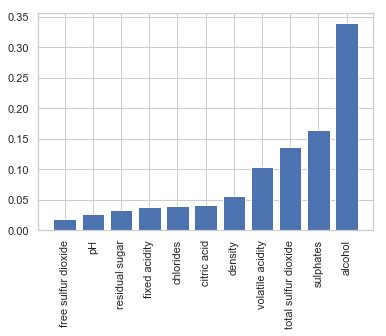

In [116]:
plt.bar(y_pos, feat_import[sort_indices], align='center')
plt.xticks(y_pos,X.columns[sort_indices], rotation =90)

#### Take Away

So the random forest with grid search gave me a 1% better f1 than the decision tree with default values.  I used the mico f1 score because our datset is really imbalanced.  

I want to be able to visualize the decision tree, but running into issues with that part.  In the random forest it is alcohol, volatile acidity and sulphates that play the greatest role in determining the quality score.    However, I think a random forest is less interpretable, but apparently if I can viz and 2 -3 random trees it will give me an intuition of the model learning.  So once I figure out my issue with the vizualization I will update!

Resources: 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
https://medium.com/@garg.mohit851/random-forest-visualization-3f76cdf6456f

#### Step 21: Linear SVC

In [117]:
LSVC = LinearSVC(random_state=123)
LSVC.fit(x_train_scaled,y_train)

##Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.
LSVC_predict = LSVC.predict(x_test_scaled)

In [120]:
cm_LSVC = pd.DataFrame(confusion_matrix(y_true = y_test, y_pred = LSVC_predict),index = [3,4,5,6,7,8], columns = [3,4,5,6,7,8])
cm_LSVC_pct = round(cm_LSVC/len(y_test),2)
cm_LSVC_diag = round(np.trace(cm_LSVC_pct),2)

print(cm_LSVC_pct)
print(cm_LSVC_diag)

     3    4     5     6     7    8
3  0.0  0.0  0.00  0.00  0.00  0.0
4  0.0  0.0  0.02  0.01  0.00  0.0
5  0.0  0.0  0.34  0.12  0.00  0.0
6  0.0  0.0  0.11  0.24  0.00  0.0
7  0.0  0.0  0.01  0.11  0.02  0.0
8  0.0  0.0  0.00  0.00  0.00  0.0
0.6


In [125]:
#red
print(classification_report(y_test,LSVC_predict))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        16
          5       0.69      0.74      0.71       201
          6       0.50      0.69      0.58       154
          7       0.70      0.11      0.19        63
          8       0.00      0.00      0.00         2

avg / total       0.59      0.60      0.56       438



C:\Users\danlew07\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Step 22: SVC with Linear Classifier

In [133]:
SVC_linear = SVC(kernel='linear')
c_values = {'C' : np.arange(0.01,10.01,0.2)}

SVC_linear_GS = GridSearchCV(SVC_linear,c_values,cv=5,n_jobs=-1,verbose=0)
SVC_linear_GS.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01,
       2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21,
       4.41, 4.61, 4.81, 5.01, 5.21, 5.41, 5.61, 5.81, 6.01, 6.21, 6.41,
       6.61, 6.81, 7.01, 7.21, 7.41, 7.61, 7.81, 8.01, 8.21, 8.41, 8.61,
       8.81, 9.01, 9.21, 9.41, 9.61, 9.81])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [110]:
##Identify the best performing model:
##.best_params_() : This method outputs to best performing parameters
##.best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test
print(SVC_linear_GS.best_params_)
SVC_linear_GS.best_estimator_

{'C': 1.4100000000000001}


SVC(C=1.4100000000000001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [134]:
##Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.
SVC_linear_predict = SVC_linear_GS.predict(x_test_scaled)

In [137]:
cm_SVC_Linear = pd.DataFrame(confusion_matrix(y_true = y_test, y_pred = SVC_linear_predict),index = [3,4,5,6,7,8], columns = [3,4,5,6,7,8])
cm_SVC_Linear_pct = round(cm_SVC_Linear/len(y_test),2)
cm_SVC_Linear_diag = round(np.trace(cm_SVC_Linear_pct),2)

print(cm_SVC_Linear_pct)
print(cm_SVC_Linear_diag)

     3    4     5     6     7    8
3  0.0  0.0  0.00  0.00  0.00  0.0
4  0.0  0.0  0.02  0.02  0.00  0.0
5  0.0  0.0  0.33  0.12  0.00  0.0
6  0.0  0.0  0.11  0.23  0.01  0.0
7  0.0  0.0  0.01  0.11  0.03  0.0
8  0.0  0.0  0.00  0.00  0.00  0.0
0.59


In [141]:
print(classification_report(y_true = y_test, y_pred = SVC_linear_predict))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        16
          5       0.69      0.73      0.71       201
          6       0.48      0.66      0.55       154
          7       0.69      0.17      0.28        63
          8       0.00      0.00      0.00         2

avg / total       0.58      0.59      0.56       438



C:\Users\danlew07\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [114]:
#red
SVC_poly = SVC(kernel='poly',verbose=0)
param_grid = {'C' : np.arange(0.01,10.01,0.2),
              'degree' : np.arange(2,7,1)}

SVC_poly_GS = GridSearchCV(SVC_poly,param_grid,cv=5,n_jobs=-1,verbose=0)
SVC_poly_GS.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=0),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01,
       2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21,
       4.41, 4.61, 4.81, 5.01, 5.21, 5.41, 5.61, 5.81, 6.01, 6.21, 6.41,
       6.61, 6.81, 7.01, 7.21, 7.41, 7.61, 7.81, 8.01, 8.21, 8.41, 8.61,
       8.81, 9.01, 9.21, 9.41, 9.61, 9.81]), 'degree': array([2, 3, 4, 5, 6])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [115]:
#red
print(SVC_poly_GS.best_params_)
print(SVC_poly_GS.best_estimator_)

SVC_poly_predict = SVC_poly_GS.predict(x_test_scaled)

{'C': 1.4100000000000001, 'degree': 3}
SVC(C=1.4100000000000001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=0)


In [116]:
cm_SVC_Poly = pd.DataFrame(confusion_matrix(y_true = y_test, y_pred = SVC_poly_predict),index = [3,4,5,6,7,8], columns = [3,4,5,6,7,8])
cm_SVC_Poly_pct = round(cm_SVC_Poly/len(y_test),2)
cm_SVC_Poly_diag = round(np.trace(cm_SVC_Poly_pct),2)

print(cm_SVC_Poly_pct)
print(cm_SVC_Poly_diag)

     3    4     5     6     7    8
3  0.0  0.0  0.00  0.00  0.00  0.0
4  0.0  0.0  0.03  0.01  0.00  0.0
5  0.0  0.0  0.34  0.12  0.00  0.0
6  0.0  0.0  0.11  0.22  0.02  0.0
7  0.0  0.0  0.01  0.08  0.05  0.0
8  0.0  0.0  0.00  0.00  0.00  0.0
0.61


In [117]:
print(classification_report(y_true= y_test, y_pred=SVC_poly_predict))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        16
          5       0.69      0.73      0.71       201
          6       0.52      0.63      0.57       154
          7       0.68      0.37      0.47        63
          8       0.00      0.00      0.00         2

avg / total       0.60      0.61      0.59       438



In [118]:
SVC_rbf = SVC(kernel='rbf')
param_grid_rbf = {'C' : np.arange(0.01,10.02,0.2),
                  'degree' : np.arange(2,7,1),
                  'gamma' : (0.1,1,10,100)}

SVC_rbf_GS = GridSearchCV(SVC_rbf,param_grid_rbf,cv=5,n_jobs=-1,verbose=0)
SVC_rbf_GS.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.000e-02, 2.100e-01, 4.100e-01, 6.100e-01, 8.100e-01, 1.010e+00,
       1.210e+00, 1.410e+00, 1.610e+00, 1.810e+00, 2.010e+00, 2.210e+00,
       2.410e+00, 2.610e+00, 2.810e+00, 3.010e+00, 3.210e+00, 3.410e+00,
       3.610e+00, 3.810e+00, 4.010e+00, 4.210e+00, 4.410e+00, 4....    9.610e+00, 9.810e+00, 1.001e+01]), 'degree': array([2, 3, 4, 5, 6]), 'gamma': (0.1, 1, 10, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [119]:
print(SVC_rbf_GS.best_params_)
print(SVC_rbf_GS.best_estimator_)

SVC_rbf_predict = SVC_rbf_GS.predict(x_test_scaled)

{'C': 2.61, 'degree': 2, 'gamma': 0.1}
SVC(C=2.61, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [120]:
cm_SVC_rbf = pd.DataFrame(confusion_matrix(y_true = y_test, y_pred = SVC_rbf_predict),index = [3,4,5,6,7,8], columns = [3,4,5,6,7,8])
cm_SVC_rbf_pct = round(cm_SVC_rbf/len(y_test),2)
cm_SVC_rbf_diag = round(np.trace(cm_SVC_rbf_pct),2)

print(cm_SVC_rbf_pct)
print(cm_SVC_rbf_diag)

     3    4     5     6     7    8
3  0.0  0.0  0.00  0.00  0.00  0.0
4  0.0  0.0  0.03  0.01  0.00  0.0
5  0.0  0.0  0.35  0.11  0.00  0.0
6  0.0  0.0  0.10  0.23  0.02  0.0
7  0.0  0.0  0.01  0.08  0.05  0.0
8  0.0  0.0  0.00  0.00  0.00  0.0
0.63


In [121]:
print(classification_report(y_true = y_test, y_pred = SVC_rbf_predict))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00        16
          5       0.72      0.76      0.74       201
          6       0.54      0.66      0.59       154
          7       0.65      0.38      0.48        63
          8       0.00      0.00      0.00         2

avg / total       0.61      0.63      0.62       438



/Users/michaelcolella/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [122]:
# The F1-Score gives you the balance of precision and recall (i.e., using the mean); scores corresponding 
# to each class show the accuracy of the classifier in classifying the data points in that class 
# compared to all of the others. F1-score was, on avg., strongest for [NAME OF MODEL HERE]

# Support is the # of samples of the true response that lie in that class and was [RESULT HERE]

# Precision is the ability of the classifier not to label a negative item positively; in other words, labeling 
# an item that's not in a class as in a class -- on avg., [NAME OF MODEL HERE] was the strongest here,
# given comparison to my actuals / test data.

# Finally, recall is the ability of the classifier to find all the positive samples; in other words, correctly
# identifying an item in the proper class. On avg., [NAME OF MODEL HERE] was the strongest here.